In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Loading the data : 

In [2]:
bikesharing_data = pd.read_csv('datasets/bike_sharing_daily.csv', index_col=0)

bikesharing_data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

#### Plotting the casual and registered bike rentals data on each day
* From here we can see number of casual users are always less than registered users count

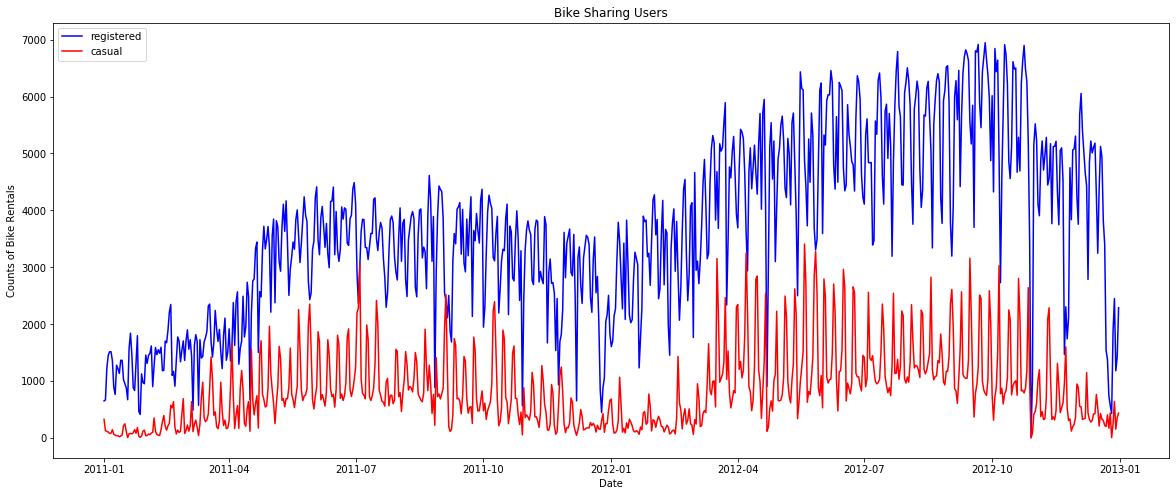

In [19]:
plt.figure(figsize=(20, 8))

plt.plot(bikesharing_data['dteday'], 
         bikesharing_data['registered'], 
         color='b', 
         label='registered')

plt.plot(bikesharing_data['dteday'], 
         bikesharing_data['casual'], 
         color='r', 
         label='casual')

plt.legend(loc='upper left')

plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [20]:
year_df = bikesharing_data.groupby('yr', as_index=False).mean()

year_df[['yr', 'cnt']]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


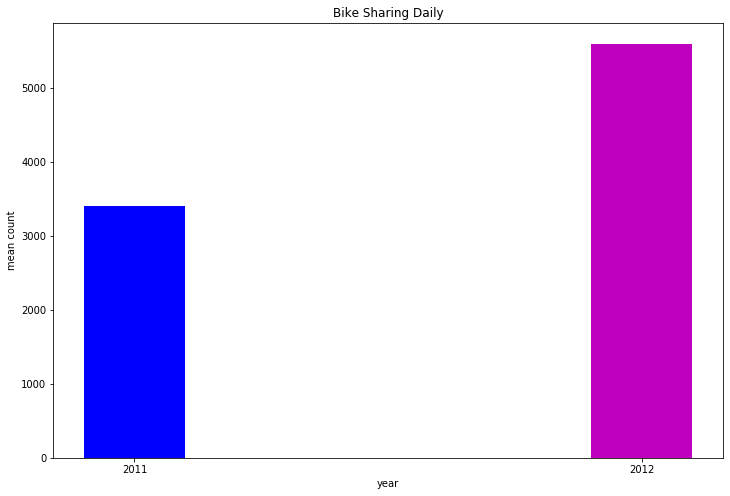

In [21]:
plt.figure(figsize=(12, 8))

colors = ['b', 'm']

plt.bar(year_df['yr'], year_df['cnt'],
        width=0.2, color=colors)

plt.xticks([0, 1], ['2011', '2012'])

plt.title('Bike Sharing Daily')
plt.xlabel('year')
plt.ylabel('mean count')

plt.show()

#### Grouping data
* Here we grouped data according to working day(0: Holiday, 1:Working day)

In [22]:
days = bikesharing_data.groupby('workingday', as_index=False).mean()

days[['cnt']]

,cnt
0,4330.168831
1,4584.820000


* From here we can see that, working day has more bike rentals than holidays, we can see the difference here. Means on working day people who are renting the bikes more

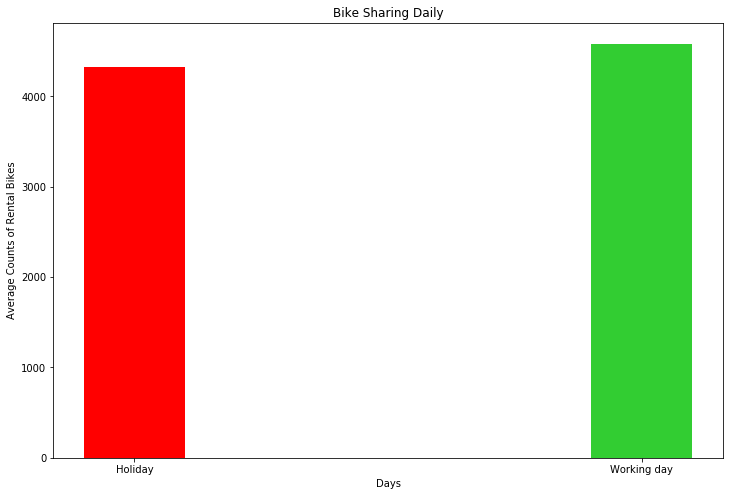

In [23]:
plt.figure(figsize=(12, 8))

plt.bar(days['workingday'], 
        days['cnt'], 
        width=0.2, 
        color=['red', 'limegreen'])

plt.xticks([0, 1], ['Holiday', 'Working day'])

plt.title('Bike Sharing Daily')
plt.xlabel('Days')
plt.ylabel('Average Counts of Rental Bikes')
plt.show()

* After that get only the values which are there in the year of 2012

In [24]:
year_data = bikesharing_data.loc[bikesharing_data['yr'] == 1]

year_data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [26]:
month_df = year_data[['mnth', 'cnt']].groupby('mnth', as_index=False).mean()

month_df

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


* Replacing all the numbers of the month by month name

In [27]:
month_df['mnth'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                          inplace=True)

month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,Mar,5318.548387
3,Apr,5807.466667
4,May,6318.225806
5,Jun,6761.000000
6,Jul,6567.967742
7,Aug,6919.451613
8,Sep,7285.766667
9,Oct,6414.225806


* Specifying the colors for months

Text(0, 0.5, 'Average Counts of Bike Rentals')

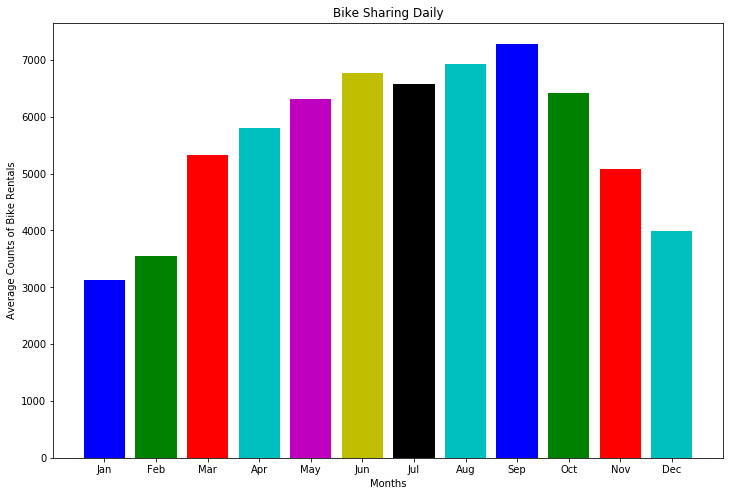

In [29]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'c']

plt.figure(figsize=(12, 8))

plt.bar(month_df['mnth'], month_df['cnt'], color=colors)

plt.title('Bike Sharing Daily')
plt.xlabel('Months')
plt.ylabel('Average Counts of Bike Rentals')

* From here we can see , the median of the count of bike rentals is 4000-5000 for the year of 2011-2012
* Also we can see;
    * max - We can see the maximum of the value is above 8000
    * min - We can see the minimum of the value is 0
    * median - Value is between 4000-5000
    * 25% - Approximately 3500
    * 75% - Approximately 6000

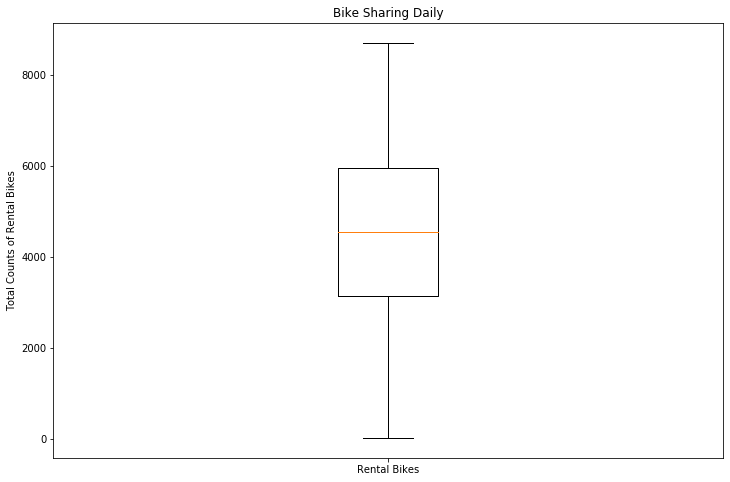

In [30]:
plt.figure(figsize=(12,8))

plt.boxplot(bikesharing_data['cnt'])

plt.xticks([1], ['Rental Bikes'])
plt.title('Bike Sharing Daily')
plt.ylabel('Total Counts of Rental Bikes')

plt.show()

* Let's take only casual, registered column from the data, and let's check the distribution properly

In [31]:
selected_bike_data = bikesharing_data[['casual', 'registered']]

selected_bike_data.head()

,casual,registered
instant,,
1,331,654
2,131,670
3,120,1229
4,108,1454
5,82,1518


In [32]:
columns = selected_bike_data.columns

columns

Index(['casual', 'registered'], dtype='object')

In [33]:
bike_data_array = selected_bike_data.values

bike_data_array

array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]])

* Specifying the colors for the boxplot

In [34]:
colors = ['g', 'm']

* Plotting this array as a boxplot and see the distribution between these two users, Casual and Registeed users
* From here we can see, distribution of casual users have least distribution and registered user have more distribution
* Basically the minimum count of both users are almost same, every other summary has huge difference

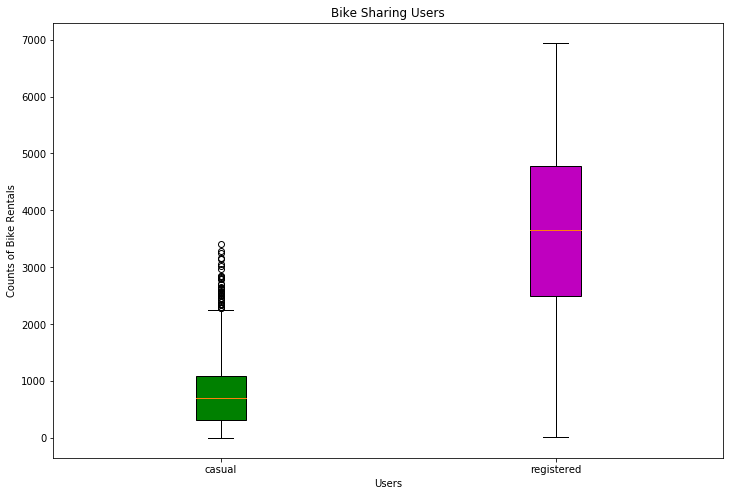

In [36]:
plt.figure(figsize=(12, 8))

bp = plt.boxplot(bike_data_array, 
                 patch_artist=True,
                 labels=columns)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')

plt.show()

* Through this violin plot, we can see that in each users which has the number of users which most in this
* For the casual user, the nrange between 500-1000 users are more
* In registered user, range between 3000-4000 is the mostly occured number of users

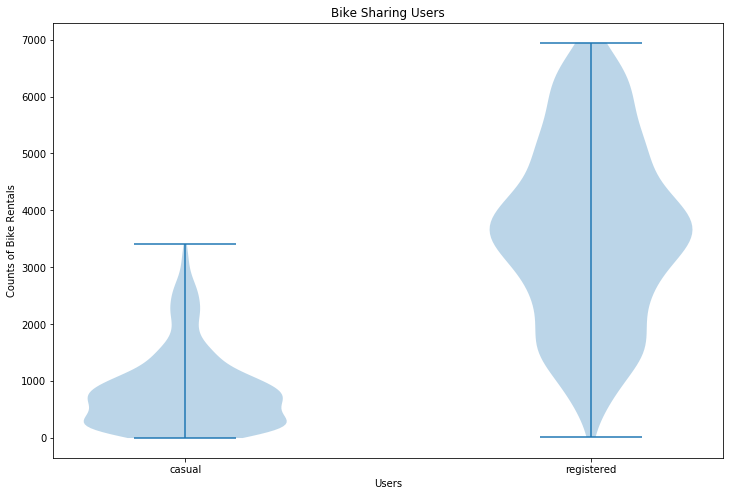

In [37]:
plt.figure(figsize=(12, 8))

vp = plt.violinplot(bike_data_array)

plt.xticks([1, 2], columns)
    
plt.title('Bike Sharing Users')
plt.xlabel('Users')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [38]:
season_data = bikesharing_data[['season', 'cnt']]

season_data.sample(5)

,season,cnt
instant,,
340,4,2594
75,1,2192
204,3,3285
494,2,5728
64,1,2077


In [43]:
grouped_data = season_data.groupby('season', as_index=False).sum()

grouped_data.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [44]:
grouped_data['season'].replace([1, 2, 3, 4], 
                               ['spring', 'summer', 'fall', 'winter'], 
                               inplace=True)

grouped_data

,season,cnt
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


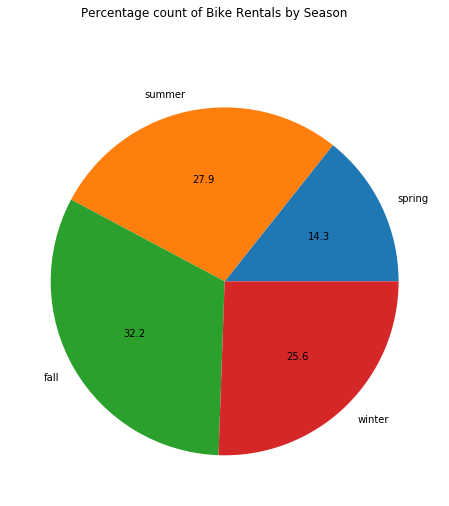

In [45]:
plt.figure(figsize=(12, 8))

plt.pie(grouped_data['cnt'],
        labels=grouped_data['season'],
        autopct='%.1f')

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()

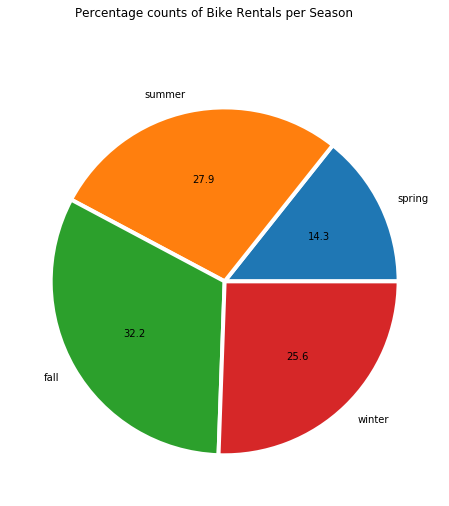

In [46]:
plt.figure(figsize=(12, 8))

plt.pie(grouped_data['cnt'],
        labels=grouped_data['season'],
        autopct='%.1f', 
        wedgeprops= {'linewidth' : 4,
                     'edgecolor' : "white"})

plt.suptitle('Percentage counts of Bike Rentals per Season')

plt.show()

* Here I am going to mention the explode, which will give major seperation from the pie chart

In [47]:
explode_max = (0, 0, 0.2, 0)

explode_min = (0.2, 0, 0, 0)

* Here I am plotting two sub plots
* From the first subplots, we can see the highest number of counts of rental bikes in `fall` season
* From the second plot you can see, the least number of counts of rental bikes for the year of 2011-2012 is `spring` season

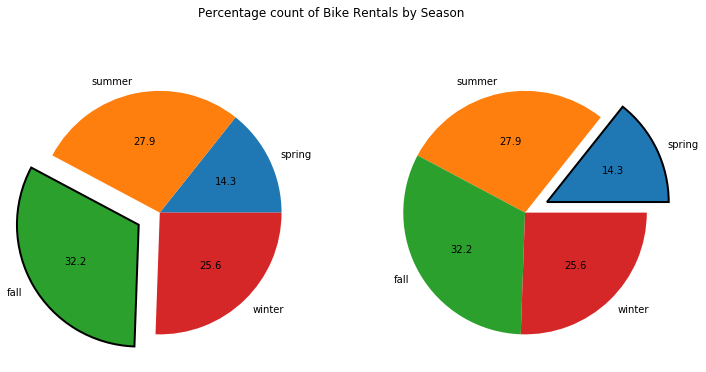

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

wedges, texts, autotexts = ax1.pie(grouped_data['cnt'],
                                   labels=grouped_data['season'],
                                   autopct='%.1f', 
                                   explode=explode_max)

wedges[2].set(edgecolor='k', linewidth=2)

wedges, texts, autotexts = ax2.pie(grouped_data['cnt'],
                                   labels=grouped_data['season'],
                                   autopct='%.1f', 
                                   explode=explode_min)

wedges[0].set(edgecolor='k', linewidth=2)

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()